# PROJECT: Students performance

## Table of Contents
1. Introduction
2. Data wrangling 
3. Exploratory Data Analysis
4. conclusion

## Introduction
### Data Set Description
The Datasets were gotten from kaggle.com
It analysis Student performance dataset
This data set consists of the marks secured by students in various subjects.
And aimed to understand the influence of the parents background, test preparation etc on students performance

### Quetion(s) for Analysis
1. how does parents level of education affect the perrformance of students
2. how does test preperation course affect their performance
3. how does gender affect their performance
4. how does race/ethnicity affect or aid thier performance
5. does lunch affect student performance

In [1]:
import numpy as np  #linear algebra
import pandas as pd  #data processing
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
#detailed overview ofthe data
#import pandas_profiling as pp
#df=data
#report=pp.ProfileReport(df,title = "Pandas Profile Report")
#report

# Data Wrangling

In [3]:
df = pd.read_csv("/Users/user/Downloads/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


I have to replace dash(-)with underscore(_) for easy reading and consistency

### Data Cleaning

In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")
categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")

In [5]:
#df.rename(columns=lambda x:x.strip().lower().replace(" ", "_"), inplace=True)

In [6]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group_b,bachelor's_degree,standard,none,72,72,74
1,female,group_c,some_college,standard,completed,69,90,88
2,female,group_b,master's_degree,standard,none,90,95,93
3,male,group_a,associate's_degree,free/reduced,none,47,57,44
4,male,group_c,some_college,standard,none,76,78,75


I want to add a new column called average_score which will be a total of math_score, reading_score, and writing_score divided by sum total which is 3

In [7]:
df["average_score"] = (df['math_score'] + df['reading_score'] + df['writing_score'])/3

In [8]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group_b,bachelor's_degree,standard,none,72,72,74,72.666667
1,female,group_c,some_college,standard,completed,69,90,88,82.333333
2,female,group_b,master's_degree,standard,none,90,95,93,92.666667
3,male,group_a,associate's_degree,free/reduced,none,47,57,44,49.333333
4,male,group_c,some_college,standard,none,76,78,75,76.333333


finding the maximum average_score

In [9]:
df.average_score.max()

100.0

introducing a new columns called student_performance
this is the columns we use to determine if the student did pass or not

for student with average score greater than or equal to 50 print pass
student less than 50 fail

In [10]:
performance = []
for score in df.average_score:
    if score >= 50:
        performance.append('pass')
    else:
        performance.append('fail')
        
   
df['student_performance']=performance       

i am converting average_score from float64 to int64

In [11]:
df["average_score"] = df["average_score"].astype(int)

In [12]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,student_performance
0,female,group_b,bachelor's_degree,standard,none,72,72,74,72,pass
1,female,group_c,some_college,standard,completed,69,90,88,82,pass
2,female,group_b,master's_degree,standard,none,90,95,93,92,pass
3,male,group_a,associate's_degree,free/reduced,none,47,57,44,49,fail
4,male,group_c,some_college,standard,none,76,78,75,76,pass


chacking the types in the Dataset

In [13]:
print (df.dtypes)

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
average_score                   int64
student_performance            object
dtype: object


In [14]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'average_score', 'student_performance'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
 8   average_score                1000 non-null   int64 
 9   student_performance          1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [16]:
for x in df.columns:
    print(x,' ' ,df[x].nunique()," ",df[x].unique(),'\n')

gender   2   ['female' 'male'] 

race/ethnicity   5   ['group_b' 'group_c' 'group_a' 'group_d' 'group_e'] 

parental_level_of_education   6   ["bachelor's_degree" 'some_college' "master's_degree" "associate's_degree"
 'high_school' 'some_high_school'] 

lunch   2   ['standard' 'free/reduced'] 

test_preparation_course   2   ['none' 'completed'] 

math_score   81   [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

reading_score   72   [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96 

checking for missing value

In [17]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
average_score                  0
student_performance            0
dtype: int64

discriptive statistical analysis


In [18]:
df.describe()

,math_score,reading_score,writing_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.445000
std,15.16308,14.600192,15.195657,14.263324
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.000000
50%,66.00000,70.000000,69.000000,68.000000
75%,77.00000,79.000000,79.000000,77.000000
max,100.00000,100.000000,100.000000,100.000000


In [19]:
df.describe(include = ["object"])

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,student_performance
count,1000,1000,1000,1000,1000,1000
unique,2,5,6,2,2,2
top,female,group_c,some_college,standard,none,pass
freq,518,319,226,645,642,897


## Exploratory Data Analysis

In [20]:
df.corr()

,math_score,reading_score,writing_score,average_score
math_score,1.000000,0.817580,0.802642,0.918771
reading_score,0.817580,1.000000,0.954598,0.970048
writing_score,0.802642,0.954598,1.000000,0.965409
average_score,0.918771,0.970048,0.965409,1.000000


pictoral representation of the above correlation

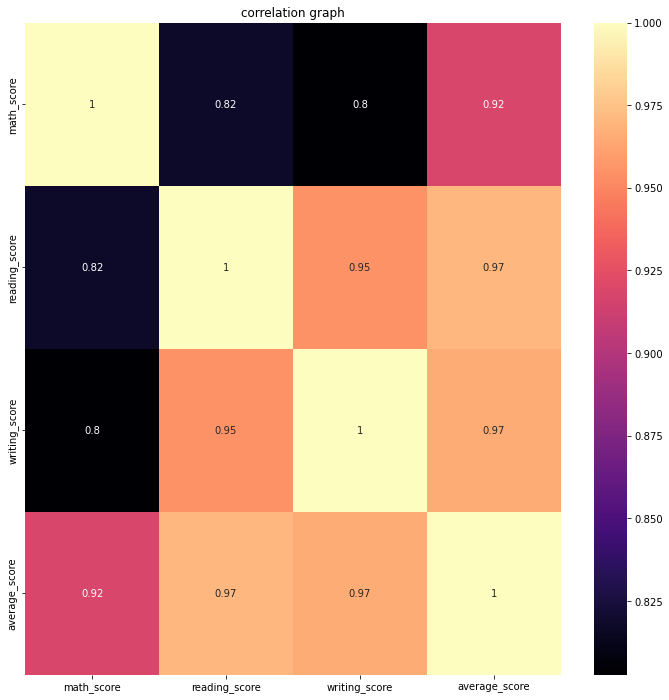

In [21]:
plt.figure(figsize = (12,12))
sns.heatmap(data = df.corr(), annot = True, cmap  = "magma")
plt.title("correlation graph")
plt.show()

Writing_score and reading_score are also highly correlated which tells us that if a student reads well then he/she also writes well.
Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa

Text(0.5, 1.0, 'dataframe visualization')

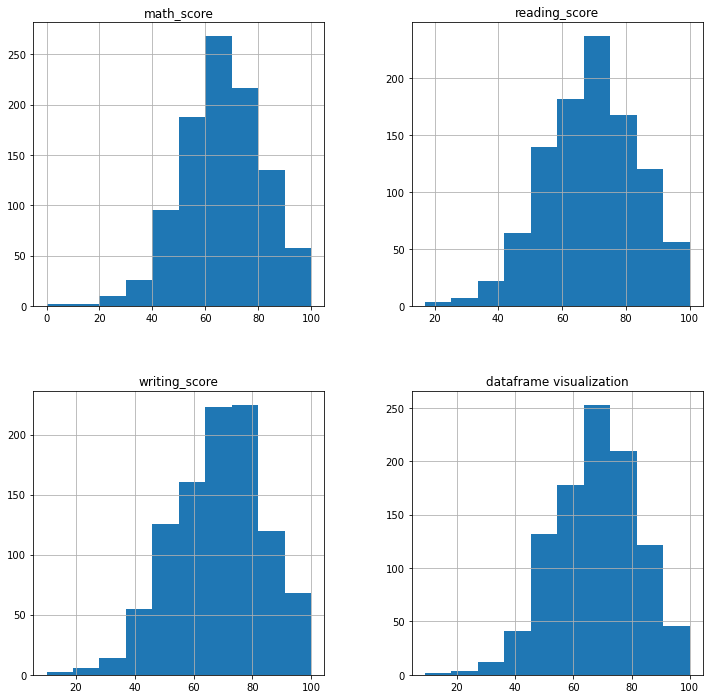

In [22]:
df.hist(figsize = (12,12))
plt.title("dataframe visualization")

they all have continous variables and appear to be skewed to the left

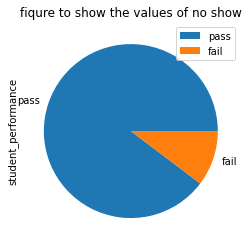

In [23]:
df["student_performance"].value_counts().plot.pie()
plt.title('fiqure to show the values of no show')
plt.legend()

more student had pass for their performance
only a few failed

In [24]:
df["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

i discovered that there are more female than males

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


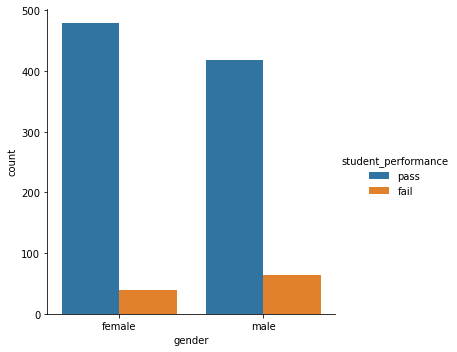

In [25]:
sns.factorplot("gender", hue = "student_performance", data = df, kind = "count")

from the above graph, i discovered that female passed more than male
male failed more than female

lets explore the math_score

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math_score', ylabel='count'>

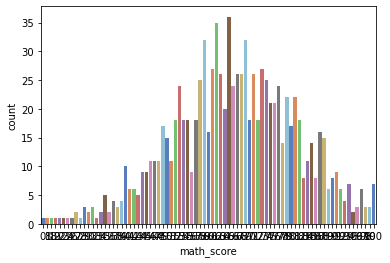

In [26]:
sns.countplot("math_score", data = df, palette="muted")

how many student passed the math

In [27]:
df['math_status'] = np.where(df['math_score']<50, 'F', 'P')
df.math_status.value_counts()

P    865
F    135
Name: math_status, dtype: int64

lets explore the writing score

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='writing_score', ylabel='count'>

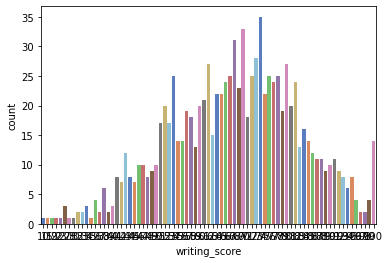

In [28]:
sns.countplot("writing_score", data = df, palette="muted")

In [29]:
df['writing_status'] = np.where(df['writing_score']<50, 'F', 'P')
df.writing_status.value_counts()

P    886
F    114
Name: writing_status, dtype: int64

lets explore the reading score

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading_score', ylabel='count'>

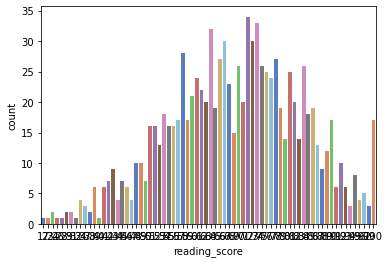

In [30]:
sns.countplot("reading_score", data = df, palette = "muted")

In [31]:
df['reading_status'] = np.where(df['reading_score']<50, 'F', 'P')
df.reading_status.value_counts()

P    910
F     90
Name: reading_status, dtype: int64

from the above grapgh and value count exploration
1. only a little over 100 seem to fail both math and writhing while a little over 800 passed out of the 1000 that paticipated
2. 90 student failed the reading text while over 900 passed
from my exploration, i can say that on the average, most student passed than failed

## Research Question 1. how does parents level of education affect the perrformance of students

In [32]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,student_performance,math_status,writing_status,reading_status
0,female,group_b,bachelor's_degree,standard,none,72,72,74,72,pass,P,P,P
1,female,group_c,some_college,standard,completed,69,90,88,82,pass,P,P,P
2,female,group_b,master's_degree,standard,none,90,95,93,92,pass,P,P,P
3,male,group_a,associate's_degree,free/reduced,none,47,57,44,49,fail,F,F,P
4,male,group_c,some_college,standard,none,76,78,75,76,pass,P,P,P


In [33]:
def catplot(column, hue):
    """function that returns the seaborn catplot
    """
    
    return sns.catplot(x = column, data = df, hue = hue, kind = "count")
    
    

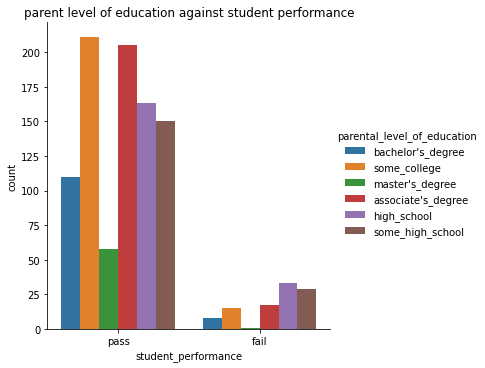

In [34]:
catplot("student_performance","parental_level_of_education").set(title = "parent level of education against student performance") 

From the above plot
parent with educational background did affect the performance of their ward
i.e. if the parental education is better their children tend to score better in all areas

## Question 2. how does test preperation course affect their performance

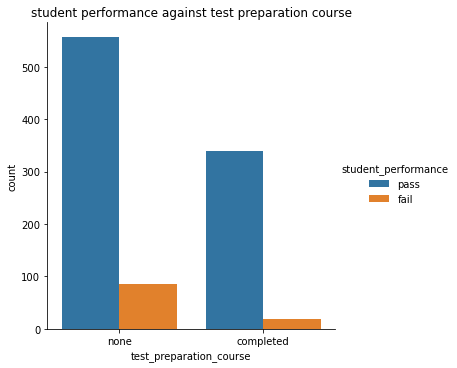

In [35]:
catplot("test_preparation_course","student_performance").set(title = "student performance against test preparation course")

## Question 3. how does gender affect their performance

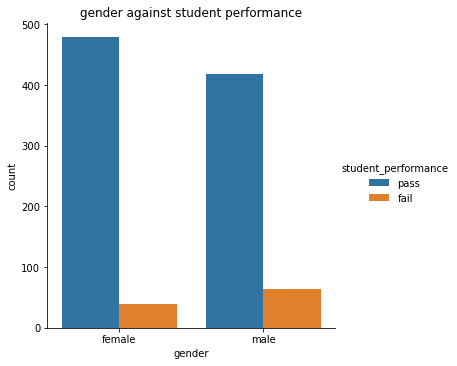

In [36]:
catplot("gender","student_performance").set(title = "gender against student performance")

more male studend failed then the female student

## Question 4. how does race/ethnicity affect or aid thier performance

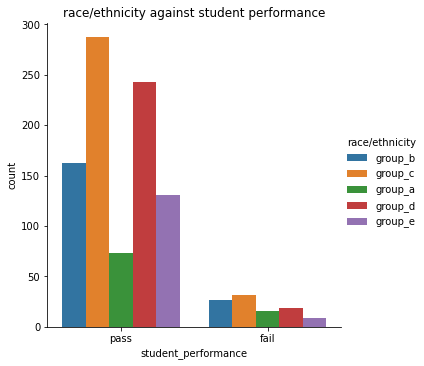

In [37]:
catplot("student_performance","race/ethnicity").set(title = "race/ethnicity against student performance")

more of group_c and group_d passed, groud_a merely made avarege

## Question 5. does lunch affect student performance

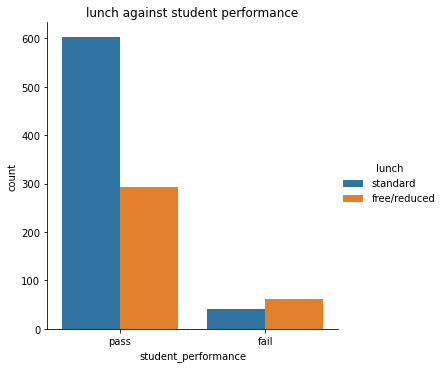

In [38]:
catplot("student_performance", "lunch").set(title = "lunch against student performance")

more standard lunch participant passed, very little of them failed. just half of free/reduced lunch mage average.
in all the cases the scores are higher by having the standard lunch.

## Conclusion
i created a new column which calculated the average score of the three scores
then rated their performance on failed and paased on a new cloumn, those that had below average fail while above average passed
i was able to analysis how the scores impacted based on different variables which include gender, race, lunch, test preparation course etc...

Each column was picked and has been analysed how they affect the studendt performance. 
For easy understanding I used graphs and plots. After all visualisation is the best way to understand....


## Limitations:
1. there were more females than males in the dataset leading to a linear result 
2. race/ethnicity was just in groups of a,b,c,d,e. no entelling of it meaning what so ever.